----------------------------
#### Linear Regression with Sklearn and Gradient Descent
----------------------------

#### 1. Matrix Method Used by Sklearn (Linear Regression)

In traditional linear regression, the most commonly used technique to calculate coefficients is the matrix method, often referred to as the 'Normal Equation'. Given `features matrix` $X$ and `target vector` $y$, the `coefficients` 
$b$ can be found using:

$$\beta = (X^T.X)^{-1} (X^T.y)$$

In [1]:
import numpy as np
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt

In [2]:
np.set_printoptions(suppress=True)

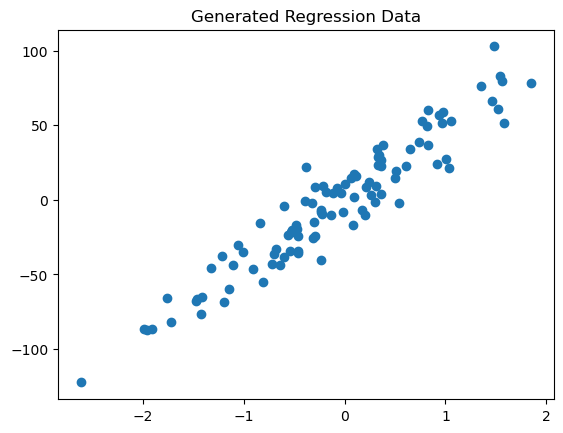

In [3]:
# Create a simple regression dataset
X, y = make_regression(n_samples=100, n_features=1, noise=15, random_state=42)
plt.scatter(X, y)
plt.title('Generated Regression Data');

In [4]:
# Adding bias term to X
X_b = np.c_[np.ones((X.shape[0], 1)), X]

# Calculate coefficients using normal equation
b = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [5]:
# show coeffs
b

array([ 1.74767298, 45.78520483])

**Use sklearn to compute the coeff**

In [6]:
from sklearn.linear_model import LinearRegression

In [7]:
linreg = LinearRegression()

linreg.fit(X, y)

linreg.intercept_, linreg.coef_

(1.7476729807904583, array([45.78520483]))

#### 2. Issues with Matrix Method
##### 2.1 `Computational Cost`: For large datasets, calculating the matrix inverse can be computationally expensive.

`Background`:
- Matrix inversion is a core step in the normal equation method. Mathematically, the computational complexity of matrix inversion for an $n×n$ matrix is $O(n^3)$ using Gaussian elimination. 
- This can become impractical for large matrices.

`Example`:
- Imagine you have a dataset with $10^4$  features (not uncommon with high-dimensional data, like text data represented as vectors). 
- If we try to compute the inverse of this matrix, the operations would be on the order of $(10^4)^3 =10^{12}$
  operations!
  
`Practical Demonstration`:
- Let's simulate the time taken to calculate the matrix inverse for increasing matrix sizes.

In [12]:
import numpy as np
import time
import matplotlib.pyplot as plt

In [13]:
matrix_sizes = [10, 100, 500, 1000, 1500, 2000, 5000]
times = []

In [14]:
for size in matrix_sizes:
    # Generating random square matrix
    matrix = np.random.rand(size, size)
    
    # Timing the inversion
    start_time = time.time()
    np.linalg.inv(matrix)
    end_time = time.time()
    
    times.append(end_time - start_time)

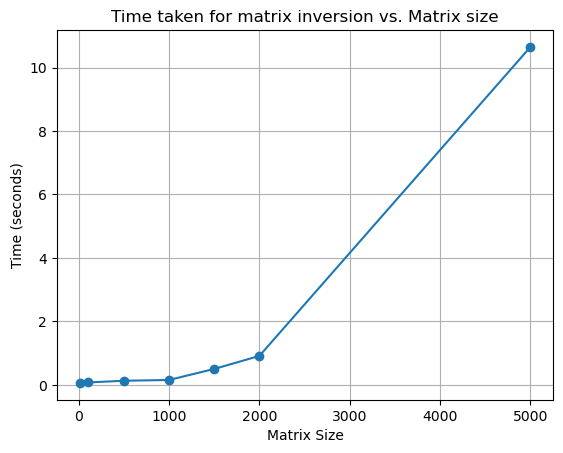

In [15]:
# Plotting the results
plt.plot(matrix_sizes, times, marker='o')
plt.xlabel('Matrix Size')
plt.ylabel('Time (seconds)')
plt.title('Time taken for matrix inversion vs. Matrix size')
plt.grid(True)

- From the resulting plot, you'll see that as the matrix size increases, the time taken for its inversion increases `non-linearly`. 
- This example clearly shows the `computational burden of matrix inversion`, especially when we deal with large datasets or high-dimensional data.

##### 2.2 Singularity:

- The matrix $X^T.X$ may be singular (non-invertible) for collinear features.

- `Singularity and Collinearity`
    - When working with matrices, a matrix is said to be singular if it does not have an inverse. For linear regression, if the matrix $X^T.X$ is `singular`, it means we can't use the normal equation to find the regression coefficients.

    - A common reason for the matrix $X^T.X$ becoming `singular` in the context of linear regression is the presence of `multicollinearity` in the dataset. 

    - Multicollinearity occurs when one or more independent variables in a regression model can be linearly predicted from the others with a high degree of accuracy.

    - `Example`:
        - Imagine you're trying to predict a person's weight based on their shirt size and their jacket size. There's a very high likelihood that these two variables (shirt size and jacket size) will be highly correlated. If you know someone's shirt size, you can make a pretty good guess about their jacket size, and vice versa.

In [16]:
import numpy as np

# Hypothetical data
X = np.array([
    [1, 0, 0],  # Bias, Shirt Size, Jacket Size
    [1, 1, 1],
    [1, 2, 2],
    [1, 1, 1],
    [1, 2, 2],
    [1, 0, 0],
    [1, 1, 1]
])
y = np.array([50, 60, 80, 62, 78, 52, 58])


In [17]:
# Compute X^T X
XTX = np.dot(X.T, X)

In [18]:
# Try to compute the inverse
try:
    inv_XTX = np.linalg.inv(XTX)
    print("Inverse computed successfully!")
except np.linalg.LinAlgError:
    print("Matrix is singular and cannot be inverted.")

Matrix is singular and cannot be inverted.


##### Solution to singularity

1.  `Remove One of the Correlated Features`: Given the correlation between shirt size and jacket size, we could just use one of them in the regression model.

2. `Regularization`: Techniques like Ridge or Lasso regression can be used, which penalize large coefficients. Ridge, for instance, adds a penalty term that's based on the magnitude of coefficients, making it less sensitive to multicollinearity.

3. `Principal Component Analysis (PCA)`: It's a dimensionality reduction technique that can be used to transform correlated variables into a set of linearly uncorrelated variables.

4. `Gradient based models` : Gradient Descent does not rely on computing the matrix inverse. Instead, it updates the coefficients iteratively in the direction that reduces the error.

##### Now, let's implement linear regression using Gradient Descent:
- on the shirt/jacket size dataset

In [19]:
# Data
X = np.array([
    [0, 0],  # Shirt Size, Jacket Size
    [1, 1],
    [2, 2],
    [1, 1],
    [2, 2],
    [0, 0],
    [1, 1]
])
y = np.array([[50], [60], [80], [62], [78], [52], [58]])


In [20]:
# Add bias term to X
X_b = np.c_[np.ones((X.shape[0], 1)), X]

In [25]:
def compute_gradients(X_b, y, theta):
    m = len(y)
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    return gradients

In [26]:
# Initial parameters
theta = np.random.randn(3, 1)  # Random initialization for [bias, coefficient_shirt, coefficient_jacket]
alpha = 0.1

n_iterations = 5000

In [27]:
# Gradient Descent
for iteration in range(n_iterations):
    gradients = compute_gradients(X_b, y, theta)
    theta -= alpha * gradients

In [28]:
print("Estimated Parameters: bias =", theta[0], ", coeff_shirt =", theta[1], ", coeff_jacket =", theta[2])

Estimated Parameters: bias = [48.85714286] , coeff_shirt = [7.04850366] , coeff_jacket = [6.95149634]


#### 3. Gradient and Derivatives
- A gradient is a direction of the steepest ascent. 
- In optimization problems, we are usually interested in the steepest descent – the opposite direction. The gradient is found by calculating the derivative of a function.

For a simple function $f(x)=x^2 - 3x +2 $ , its derivative $f'(x)=2x - 3$.

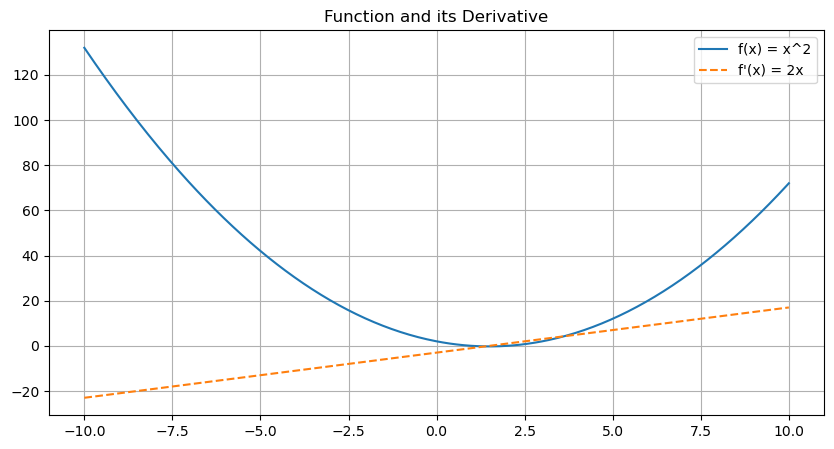

In [29]:
x = np.linspace(-10, 10, 400)

y = x**2 - 3*x + 2
dy = 2*x -3

plt.figure(figsize=(10,5))
plt.plot(x, y, label='f(x) = x^2')
plt.plot(x, dy, label="f'(x) = 2x", linestyle='--')
plt.title('Function and its Derivative')
plt.legend()
plt.grid(True)

In [30]:
# Define the function and its derivative
def f(x):
    return x**2 - 3*x + 2

def gradient(x):
    return 2*x - 3

In [31]:
# Gradient Descent
x = 10
learning_rate = 0.1
n_iterations  = 100
x_values = [x]

In [32]:
for iteration in range(n_iterations):
    grad = gradient(x)
    x = x - learning_rate * grad
    x_values.append(x)

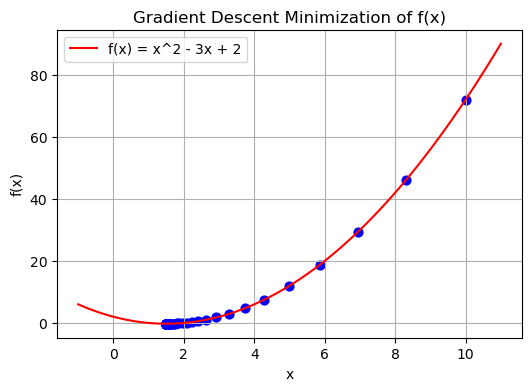

In [33]:
# Plotting
plt.figure(figsize=(6, 4))
x_range = np.linspace(-1, 11, 400)
plt.plot(x_range, f(x_range), '-r', label='f(x) = x^2 - 3x + 2')
plt.scatter(x_values, [f(val) for val in x_values], c='b', s=40, marker='o')
plt.title('Gradient Descent Minimization of f(x)')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid(True)

#### Linear Regression using Gradient Descent

**1. Model Representation:**

For linear regression, the hypothesis ℎ is represented as:

$$h_\theta(x) = \theta_0 + \theta_1.x_1 + \theta_2.x_2 + ... + \theta_n.x_n$$

where:
- $\theta_0, \theta_1$ ... are the parameters of the model
- $x_1, x_2...$ are the feature values
- $n$ is the number of features


**2. Cost Function:**
The objective of linear regression is to minimize the difference between the predicted values and the actual values. The Mean Squared Error (MSE) is a common cost function for linear regression:
$$
J(\theta)=\frac{1}{2 m} \sum_{i=1}^m\left(h_\theta\left(x^{(i)}\right)-y^{(i)}\right)^2
$$

Where:
- $m$ is the number of training examples.
- $y^{(i)}$ is the actual value for the $i^{\text {th }}$ training example.
- $h_\theta\left(x^{(i)}\right)$ is the model's prediction for the $i^{t h}$ training example.

**3. Gradient Computation:**
The gradient of the cost function with respect to each parameter $\theta_j$ is computed as:
$$
\frac{\partial J(\theta)}{\partial \theta_j}=\frac{1}{m} \sum_{i=1}^m\left(h_\theta\left(x^{(i)}\right)-y^{(i)}\right) x_j^{(i)}
$$

**4. Parameter Update:**
In Gradient Descent, we iteratively adjust the parameters in the direction of the steepest descent (i.e., in the direction of the negative gradient) to minimize the cost function. For each parameter $\theta_j$ :
$$
\theta_j:=\theta_j-\alpha \frac{\partial J(\theta)}{\partial \theta_j}
$$

Where:
- $\alpha$ is the learning rate, determining the step size in the direction of the gradient.

**5. Iterative Process:**
Steps 3 and 4 are repeated until the change in the cost function between iterations is negligible or until a pre-defined number of iterations have been completed.

**6. Learning Rate:**

The learning rate α is a critical hyperparameter. If it's too high, GD may overshoot and fail to converge. 

If it's too small, the convergence might be very slow. 

#### Model build using GD

##### 1. Define Dummy Regression Data with 3 Features

In [34]:
import numpy as np
import pandas as pd

# Setting seed for reproducibility
np.random.seed(42)

In [35]:
# Generate some random data
np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

In [44]:
#location = 'https://github.com/gridflowai/gridflowAI-datasets-icons/raw/master/AI-DATASETS/01-MISC/Advertising.csv'

In [45]:
# df = pd.read_csv(location)

# df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [46]:
# X = df.drop(['sales'], axis=1).values
# y = df.sales.values

In [36]:
from sklearn.preprocessing import StandardScaler

In [37]:
# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [38]:
from sklearn.model_selection import train_test_split

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.10)

##### 2. Define Cost Function

In [40]:
def compute_cost(X_b, y, theta):
    m = len(y)
    predictions = X_b.dot(theta)
    cost = (1 / m) * np.sum(np.square(predictions - y))
    return cost


##### 3. Function for Computing Gradients

In [41]:
def compute_gradients(X_b, y, theta):
    m         = len(y)
    gradients = 1/m * X_b.T.dot(X_b.dot(theta) - y)
    
    return gradients

##### 4. Function for Weights Update

In [42]:
def update_weights(X_b, y, theta, learning_rate):
    gradients = compute_gradients(X_b, y, theta)
    theta -= learning_rate * gradients
    return theta


##### 5. Setting the Learning Rate

In [43]:
learning_rate = 0.001

##### 6. Run Gradient Descent

In [44]:
X_b = np.c_[np.ones((X.shape[0], 1)), X]  # Add bias term
theta = np.random.randn(2, 1)  # Initialize weights randomly

cost_prev = float('inf')
cost = compute_cost(X_b, y, theta)
iterations = 0

while abs(cost_prev - cost) > 0.001:
    theta = update_weights(X_b, y, theta, learning_rate)
    cost_prev = cost
    cost = compute_cost(X_b, y, theta)
    iterations += 1

print("Converged after", iterations, "iterations.")


Converged after 1481 iterations.


In [45]:
print("Weights from Gradient Descent:")
print("Bias (theta_0):", theta[0][0])
print("Weight (theta_1):", theta[1][0])

Weights from Gradient Descent:
Bias (theta_0): 2.296879227552302
Weight (theta_1): 4.084868087497805


In [41]:
# iterations = 1000

# # Gradient Descent Iteration
# for iteration in range(iterations):
#     gradients  = 2/m * X_b.T.dot(X_b.dot(theta) - y_train.reshape(-1, 1))
#     theta_prev = theta
#     theta = theta - learning_rate * gradients
    
#     # Break if the difference between the new and previous theta is small
#     if np.linalg.norm(theta - theta_prev, 2) < tolerance:
#         break

# print("Theta (parameters) from refined Gradient Descent:")
# print(theta)

##### 7. Use matrix method for the beta

In [46]:
# Adding bias term to X
X_b = np.c_[np.ones((X_train.shape[0], 1)), X_train]

# Calculate coefficients using normal equation
b = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y_train)

b

array([[6.82599471],
       [1.61510943]])

##### 8. define a prediction function

In [71]:
def predict(X, theta):
    """
    Predict the output for the given input features X using the model parameters theta.
    """
    # Add bias term to X (x0 = 1 for all examples)
    X_b = np.c_[np.ones((X.shape[0], 1)), X]
    
    # Compute predictions
    return X_b.dot(theta)

In [72]:
# Get predictions
y_pred = predict(X_test, theta)

##### 9. Compute the loss metrics

In [73]:
from sklearn import metrics

In [74]:
# Model evaluation metrics for regression
print('Mean Abs Error   MAE    : ', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Sq  Error MSE      : ', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Sq Error RMSE : ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('MAPE                    : ', np.mean(np.abs((y_test - y_pred) / y_test)) * 100)
print('MPE                     : ', np.mean((y_test - y_pred) / y_test) * 100)
print('r2 value                : ', metrics.r2_score(y_test, y_pred))

Mean Abs Error   MAE    :  3.746267275442559
Mean Sq  Error MSE      :  18.207674370619323
Root Mean Sq Error RMSE :  4.267045156852611
MAPE                    :  70.55768994623014
MPE                     :  70.37728698866404
r2 value                :  -2.52259522360824


##### 10. Use Sklearn Linear Regression to Perform the Same

In [75]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

y_pred = lin_reg.predict(X_test)

print("\nTheta (parameters) from Sklearn Linear Regression:")
print(lin_reg.intercept_)
print(lin_reg.coef_)

print('Mean Abs Error   MAE    : ', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Sq  Error MSE      : ', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Sq Error RMSE : ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('MAPE                    : ', np.mean(np.abs((y_test - y_pred) / y_test)) * 100)
print('MPE                     : ', np.mean((y_test - y_pred) / y_test) * 100)
print('r2 value                : ', metrics.r2_score(y_test, y_pred))


Theta (parameters) from Sklearn Linear Regression:
[6.82599471]
[[1.61510943]]
Mean Abs Error   MAE    :  0.6969601995894961
Mean Sq  Error MSE      :  0.8811519402815466
Root Mean Sq Error RMSE :  0.9386969373986189
MAPE                    :  11.121109739199957
MPE                     :  -3.7988200285670453
r2 value                :  0.8295256410605869


##### 11. Using SGDRegressor on the Dummy Data:

In [164]:
from sklearn.linear_model import SGDRegressor

In [166]:
# Fit the model using SGDRegressor
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1, random_state=42)
sgd_reg.fit(X_scaled, y)

print("Intercept from SGDRegressor:", sgd_reg.intercept_)
print("Coefficients from SGDRegressor:", sgd_reg.coef_)

Intercept from SGDRegressor: [14.00792309]
Coefficients from SGDRegressor: [4.26564844 2.66453336 0.04707465]
